# PySpark 2.2.0 Machine Learning

Test for PySpark 2.2.0

https://spark.apache.org/docs/2.2.0/mllib-collaborative-filtering.html

We wil use ALS (Alternating Least Square) Algorithm for recommender systems.

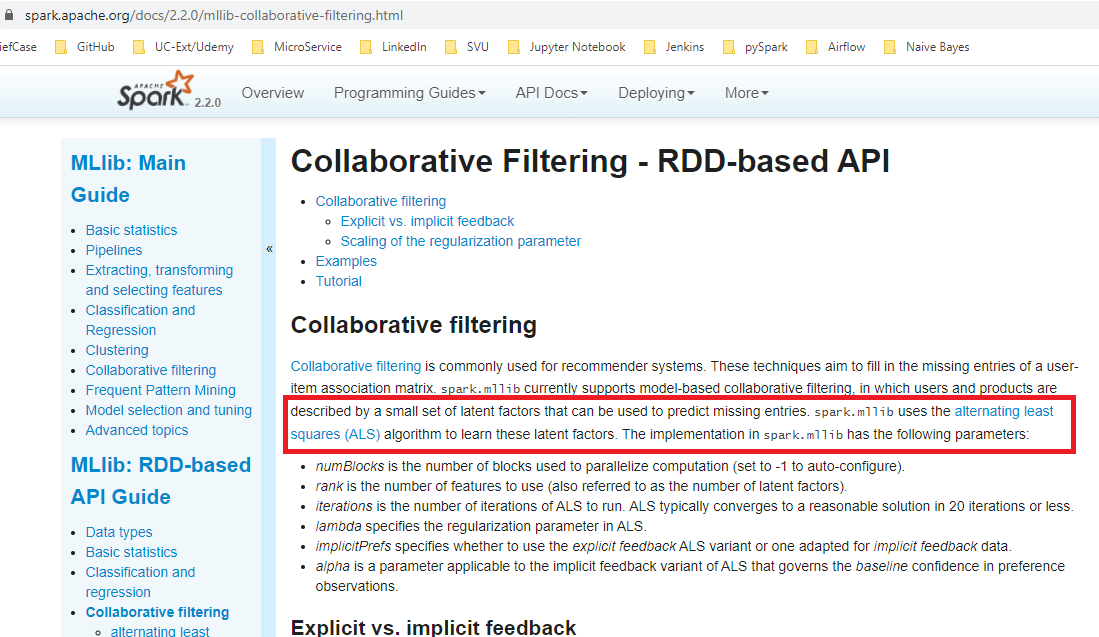

In [4]:
import pyspark
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
# Load and parse the data
data = sc.textFile("./test.data")
print('data:')
print(data)
print()
ratings = data.map(lambda l: l.split(','))\
    .map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))

# Build the recommendation model using Alternating Least Squares
rank = 10
numIterations = 10
model = ALS.train(ratings, rank, numIterations)

# Evaluate the model on training data
testdata = ratings.map(lambda p: (p[0], p[1]))
print('testdata:')
print(testdata)
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))

# Save and load model
model.save(sc, "./myCollaborativeFilter1")
sameModel = MatrixFactorizationModel.load(sc, "./myCollaborativeFilter1")
sc.stop()

data:
./test.data MapPartitionsRDD[238] at textFile at NativeMethodAccessorImpl.java:0

testdata:
PythonRDD[449] at RDD at PythonRDD.scala:53
Mean Squared Error = 6.266551582008481e-06


# Cluster

https://spark.apache.org/docs/2.2.0/cluster-overview.html

You can investigate more the cluster algorithm.

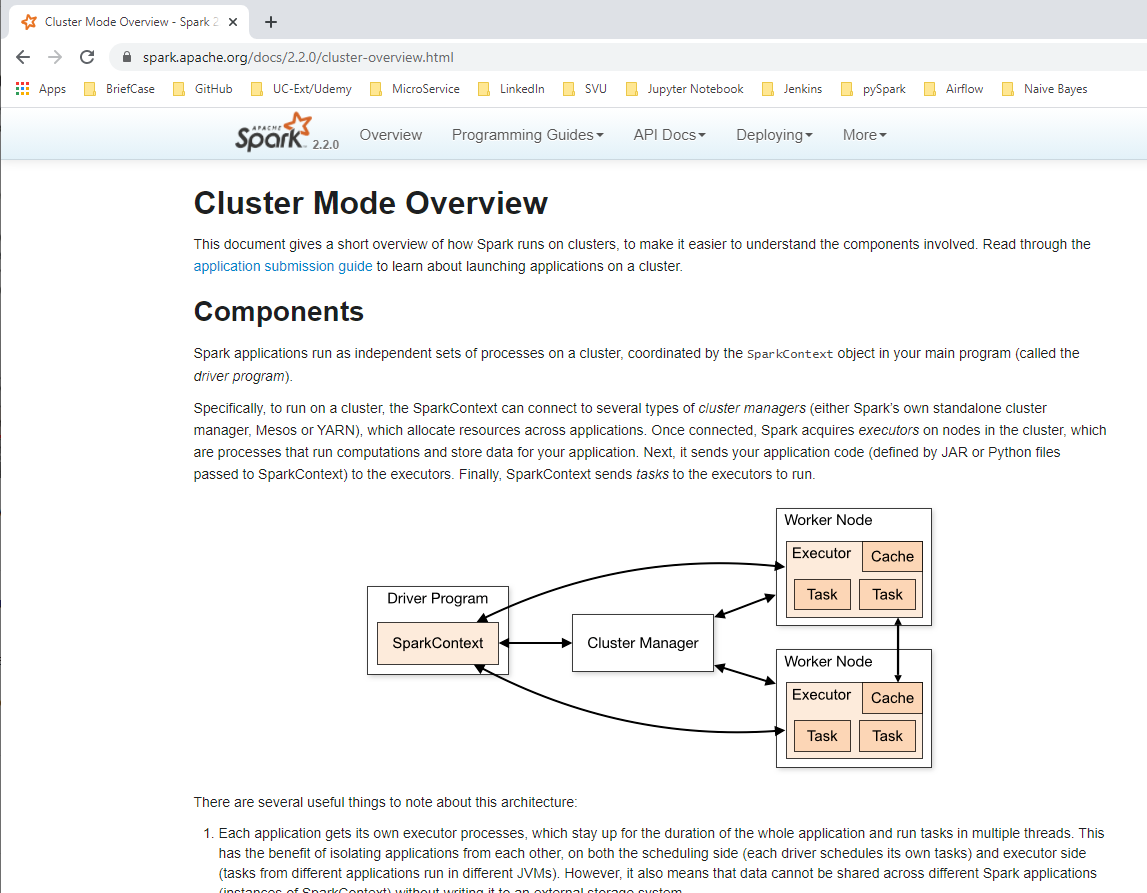